# Training Data

We create a configuration class for each model, it will be easier to pass this argument in every function that we will create.

In [1]:
import pandas as pd                                    
import numpy as np                                     
import matplotlib.pyplot as plt                    
%matplotlib inline
import seaborn as sns

from scipy.stats import gaussian_kde as kde
from sklearn.ensemble import RandomForestClassifier
from config import *
from train_fct import *
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit

## Import clean data

In [2]:
players = pd.read_csv('players.csv',index_col=0)

In [3]:
players.head()

,mean_rated,height,weight,club,leagueCountry,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,YC_IAT,YR_IAT,RC_IAT,YC_EXP,YR_EXP,RC_EXP
0,0.0,182.0,71.0,33,0,654.0,247.0,179.0,228.0,9.0,19.0,0.0,0.0,1.953444,0.000000,0.000000,3.148124,0.000000,0.00000
1,0.0,183.0,73.0,90,2,336.0,141.0,73.0,122.0,62.0,42.0,0.0,1.0,3.505362,0.025894,0.000000,4.867461,0.025844,0.00000
2,0.0,165.0,63.0,82,0,412.0,200.0,97.0,115.0,31.0,11.0,0.0,0.0,0.643299,0.000000,0.000000,1.141167,0.000000,0.00000
3,0.0,178.0,76.0,6,0,260.0,150.0,42.0,68.0,39.0,31.0,0.0,1.0,4.248251,0.334684,0.000000,5.822391,0.336101,0.00000
4,0.0,180.0,73.0,50,1,124.0,41.0,40.0,43.0,1.0,8.0,4.0,2.0,0.770171,0.133874,0.523449,0.773432,0.134440,0.61693


# Assignment 1
>Train a `sklearn.ensemble.RandomForestClassifier` that given a soccer player description outputs his skin color. Show how different parameters 
passed to the Classifier affect the overfitting issue. Perform cross-validation to mitigate the overfitting of your model. Once you assessed your model,
inspect the `feature_importances_` attribute and discuss the obtained results. With different assumptions on the data (e.g., dropping certain features even
before feeding them to the classifier), can you obtain a substantially different `feature_importances_` attribute?

In this part, we will train several random forest classifier with different set of features after the data cleaning (please see Data Cleaning notebook).

We used a confusion matrix as we decided to use a binary classification for the skin colour :

>1- Black  
0- White

**Terminology**

- **True Positives (TP):** we **correctly** predicted that the player **is** black  predict 1, actual 1
- **True Negatives (TN):** we **correctly** predicted that the player **is not** black predict 0, actual 0
- **False Positives (FP):** we **incorrectly** predicted that the player **is** black  predict 1 , actual 0
- **False Negatives (FN) :** we **incorrectly** predicted that player **is not**  predict 0, actual 1

## Train random forest classifier with all features

In [4]:
# Store data features and labels
y = players['mean_rated']
X = players.drop('mean_rated',axis=1)

In [5]:
# Initialize the random forest classifier with default parameters, then we train it.
cfg = config_rfc()
rfc_trained = train(X,y,cfg,modele_type='rfc',verbose=1,test_set_size=0.3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
The accuracy of this model is 0.818763326226
The precision score of this model is 0.318181818182
The recall score of this model is 0.818763326226


                   Predicted black (1) Predicted white (0)
Actually white (0)               FP=15              TN=377
Actually black (1)                TP=7               FN=70


During the data cleaning, we discovered that after the binary classification
1299 players were classed as 0 (light skinned)
263 were classed as 1 (dark skinned)

The fact that our classifier has a lot less data sets for dark skinned people explains why the precision level is low as precision is computed as : TP/(TP + FP)

Feature ranking:
1. feature 3 - leagueCountry (0.081682)
2. feature 12 - YC_IAT (0.079509)
3. feature 4 - games (0.074542)
4. feature 9 - yellowCards (0.069862)
5. feature 8 - goals (0.068207)
6. feature 2 - club (0.067969)
7. feature 1 - weight (0.066657)
8. feature 15 - YC_EXP (0.065850)
9. feature 5 - victories (0.063143)
10. feature 7 - defeats (0.060518)
11. feature 6 - ties (0.053651)
12. feature 0 - height (0.052318)
13. feature 16 - YR_EXP (0.043618)
14. feature 13 - YR_IAT (0.040593)
15. feature 17 - RC_EXP (0.039988)
16. feature 14 - RC_IAT (0.031575)
17. feature 10 - yellowReds (0.026930)
18. feature 11 - redCards (0.013389)


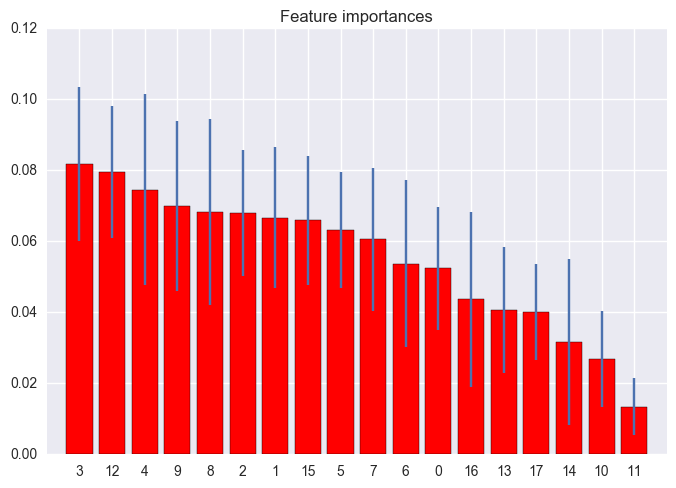

In [6]:
plot_forest_importances(rfc_trained,X)

We trained the model with many features, some of them never change such as height, weight, position, which means that the model will learn the characteristics of the players and it is more likely to overfit.

## Remove features 
Based on our intuition, we remove features which have no impact on skin color

In [7]:
X.drop(['height', 'weight', 'club', 'leagueCountry', 'games', 'victories',
       'ties', 'defeats', 'goals'],axis=1,inplace=True)

In [8]:
X.columns

Index([u'yellowCards', u'yellowReds', u'redCards', u'YC_IAT', u'YR_IAT',
       u'RC_IAT', u'YC_EXP', u'YR_EXP', u'RC_EXP'],
      dtype='object')

In [9]:
cfg = config_rfc(min_samples_leaf=5,n_estimators=10)
rfc_trained = train(X,y,cfg,modele_type ='rfc',verbose=1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
The accuracy of this model is 0.820895522388
The precision score of this model is 0.181818181818
The recall score of this model is 0.820895522388


                   Predicted black (1) Predicted white (0)
Actually white (0)                FP=9              TN=383
Actually black (1)                TP=2               FN=75


Although we have lost some accuracy, we believe that removing these features will make the model easier to generalise for future datasets and therefore produce a more consistent output in the long run.

Feature ranking:
1. feature 6 - YC_EXP (0.224675)
2. feature 3 - YC_IAT (0.182953)
3. feature 0 - yellowCards (0.150996)
4. feature 5 - RC_IAT (0.117699)
5. feature 4 - YR_IAT (0.113387)
6. feature 7 - YR_EXP (0.098666)
7. feature 8 - RC_EXP (0.077646)
8. feature 2 - redCards (0.022197)
9. feature 1 - yellowReds (0.011780)


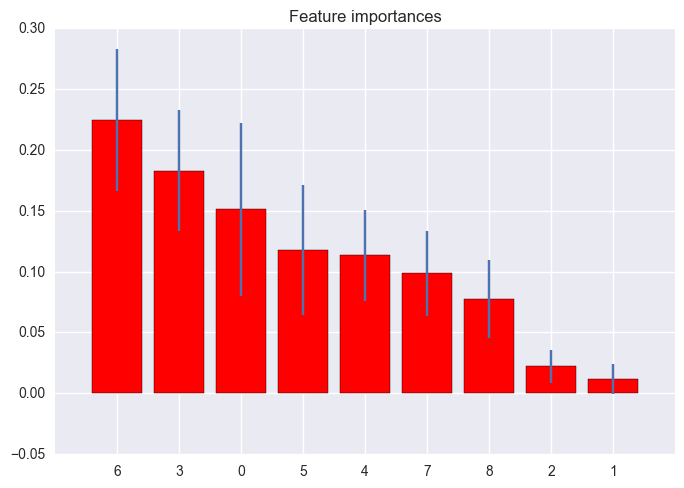

In [10]:
plot_forest_importances(rfc_trained,X)

We observe that the most important features are *YC_EXP*, *YC_IAT* and *yellowCards*.

## Influence of parameters

In order to optimize our estimator, we decided to check the impact of certain key parameters as shown below :

>n_estimators : The number of trees in the forest.

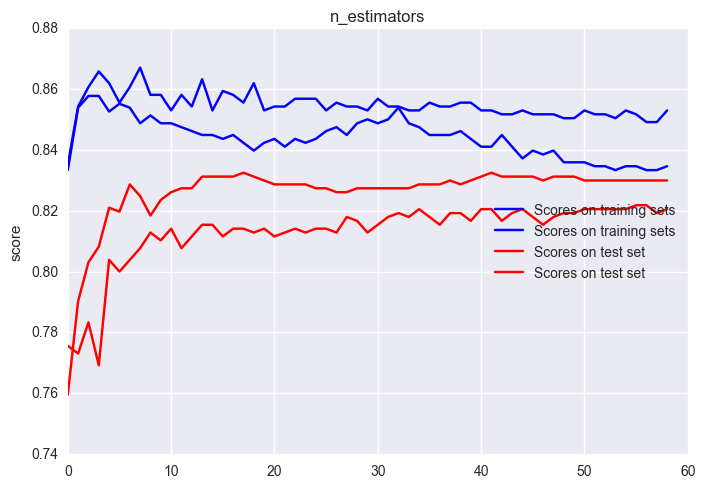

In [11]:
plot_validation_curve(create_mdl(cfg,modele_type = "rfc"), X, y, "n_estimators", range(1, 60))

Higher number of trees give a better score but makes the performance slower. The graph above shows the score icrease as the number of trees in the forest. The score is contant after a number of trees equal to 10.

>max_depth : The maximum depth of the tree.

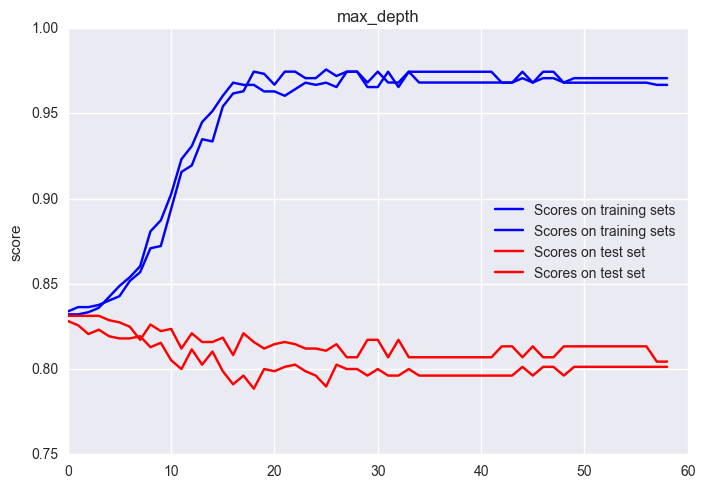

In [26]:
plot_validation_curve(create_mdl(cfg,modele_type = "rfc"), X, y, "max_depth", range(1, 60))

As we can observe on the graph above, the score will be constant after a max depth equal to 20.

>min_samples_leaf : The minimum number of samples required to be at a leaf node.

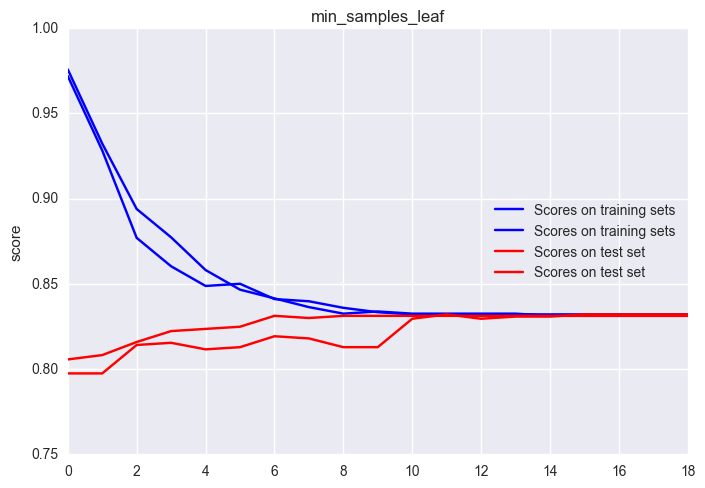

In [13]:
plot_validation_curve(create_mdl(cfg,modele_type = "rfc"), X, y, "min_samples_leaf", range(1, 20))

A smaller leaf makes the model more prone to capturing noise in train data.

>min_samples_split : The minimum number of samples required to split an internal node.

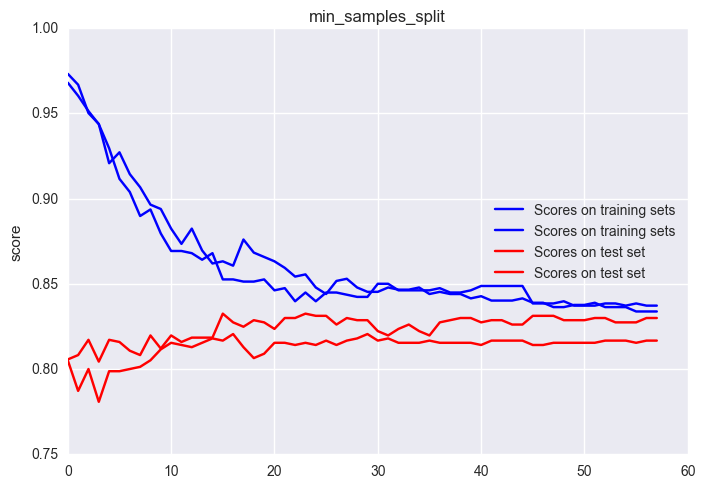

In [27]:
plot_validation_curve(create_mdl(cfg,modele_type = "rfc"), X, y, "min_samples_split", range(2, 60))

Defines the minimum number of samples which are required in a node to be considered for splitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.

# Learning curve

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
The accuracy of this model is 0.81236673774
The precision score of this model is 0.28
The recall score of this model is 0.81236673774


                   Predicted black (1) Predicted white (0)
Actually white (0)               FP=18              TN=374
Actually black (1)                TP=7               FN=70
 -------------------------- 


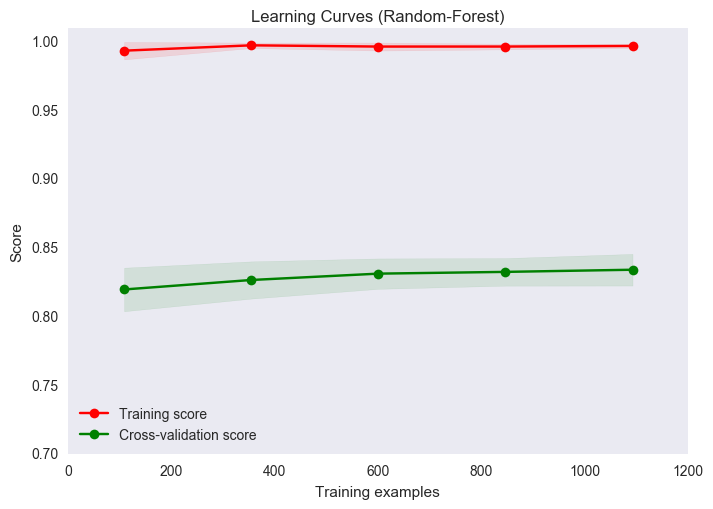

In [15]:
y = players['mean_rated']
X = players.drop('mean_rated',axis=1)
cfg = config_rfc(n_estimators=30)
rfc_trained = train(X,y,cfg,modele_type='rfc',verbose=1,k_fold=20)
print (' -------------------------- ')
title = "Learning Curves (Random-Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)

plot_learning_curve(rfc_trained, title, X, y, ylim=(0.7, 1.01), cv=cv)
plt.show()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
The accuracy of this model is 0.825159914712
The precision score of this model is 0.368421052632
The recall score of this model is 0.825159914712


                   Predicted black (1) Predicted white (0)
Actually white (0)               FP=12              TN=380
Actually black (1)                TP=7               FN=70
 -------------------------- 


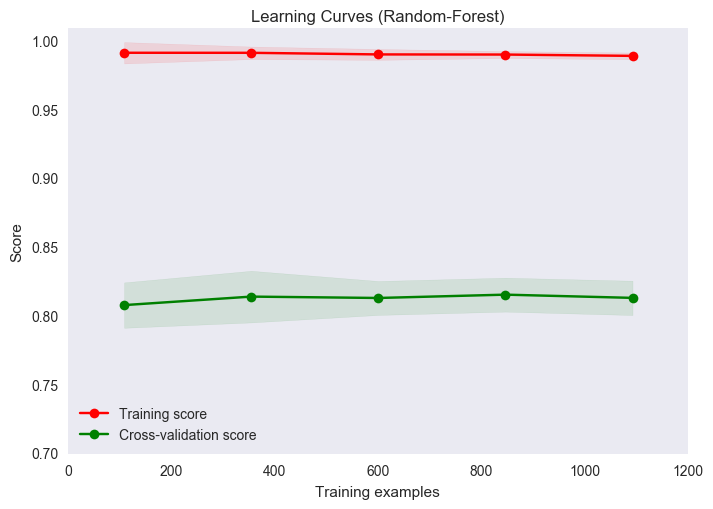

In [16]:
X.drop(['height', 'weight', 'club', 'leagueCountry', 'games', 'victories',
       'ties', 'defeats', 'goals'],axis=1,inplace=True)
cfg = config_rfc(n_estimators=30)
rfc_trained = train(X,y,cfg,modele_type='rfc',verbose=1,k_fold=20)
print (' -------------------------- ')
title = "Learning Curves (Random-Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)
plot_learning_curve(rfc_trained, title, X, y, ylim=(0.7, 1.01), cv=cv)
plt.show()

We compared the two learning curves and decided that is the essential the same. The main difference was a slight decrease in accuracy for the second set. This meant that the features dropped from our intuition were right as the extra features didn't affect the cross-validation score.

# Learning curve with high bias :

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
The accuracy of this model is 0.829424307036
The precision score of this model is 0.285714285714
The recall score of this model is 0.829424307036


                   Predicted black (1) Predicted white (0)
Actually white (0)                FP=5              TN=387
Actually black (1)                TP=2               FN=75
 -------------------------- 


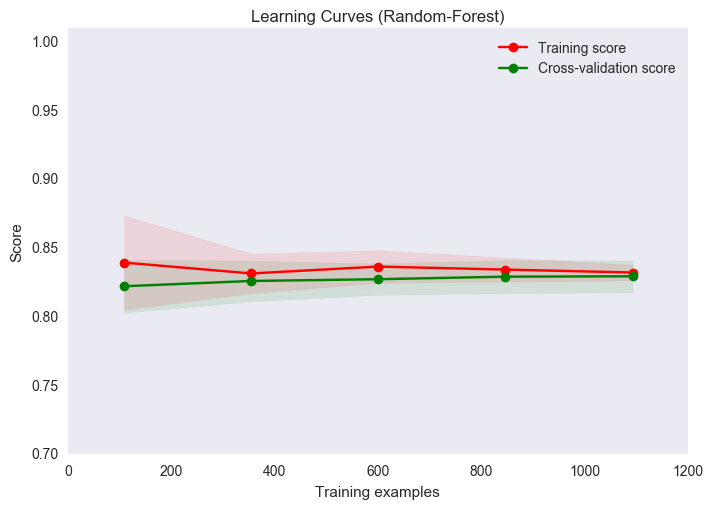

In [17]:
cfg = config_rfc(n_estimators=1,max_depth=1,min_samples_leaf=1)
rfc_trained = train(X,y,cfg,modele_type='rfc',verbose=1,k_fold=20)
print (' -------------------------- ')
title = "Learning Curves (Random-Forest)"
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)
plot_learning_curve(rfc_trained, title, X, y, ylim=(0.7, 1.01), cv=cv)
plt.show()

With a simpler model, the learning curves are close, that means the model underfit the data.

# Assignment 2
>Aggregate the referee information grouping by soccer player, and use an unsupervised learning technique to cluster the soccer players in 2 disjoint
clusters. Remove features iteratively, and at each step perform again the clustering and compute the silhouette score -- can you find a configuration of features with high silhouette
score where players with dark and light skin colors belong to different clusters? Discuss the obtained results.

As we used the euclidean distance between the data points and the centroids as the metric for the K-means clustering algorithm, each feature was treated equally. 
Since K-means clustering did not have a features importance attribute, we decided to use the results from the random forest classifiers feature importance as the benchmark for iteratively removing the features for the K-means.

## Preprocessing

In [18]:
from sklearn.preprocessing import scale

In [19]:
y = players['mean_rated']
X = players.drop('mean_rated',axis=1)

In [20]:
X.drop(['height', 'weight', 'club', 'leagueCountry', 'games', 'victories',
       'ties', 'defeats', 'goals'],axis=1,inplace=True)

In [21]:
X.columns

Index([u'yellowCards', u'yellowReds', u'redCards', u'YC_IAT', u'YR_IAT',
       u'RC_IAT', u'YC_EXP', u'YR_EXP', u'RC_EXP'],
      dtype='object')

We reorder the columns based on the result from feature importances on the asignement 1.

In [22]:
X = X.loc[:,['yellowReds','redCards','RC_EXP','RC_IAT','YR_EXP','YR_IAT','yellowCards','YC_IAT','YC_EXP']]

In [23]:
X.columns

Index([u'yellowReds', u'redCards', u'RC_EXP', u'RC_IAT', u'YR_EXP', u'YR_IAT',
       u'yellowCards', u'YC_IAT', u'YC_EXP'],
      dtype='object')

In [24]:
X = scale(X)
X = pd.DataFrame(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


train_fct.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_train.drop(X_train.columns[0],axis=1,inplace=True)
train_fct.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_test.drop(X_test.columns[0],axis=1,inplace=True)


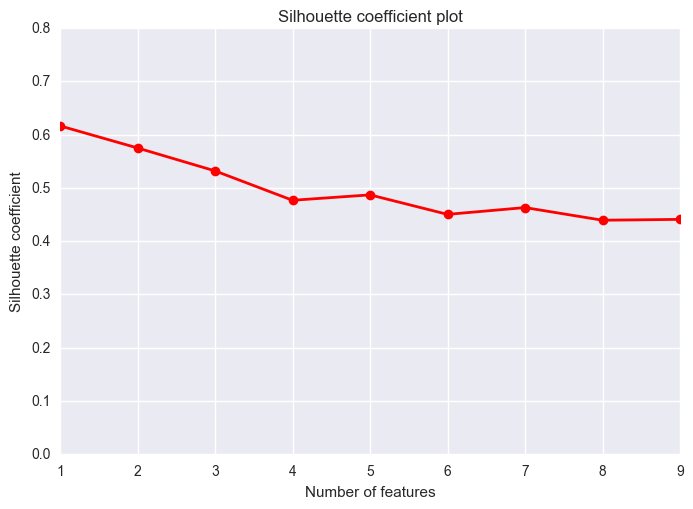

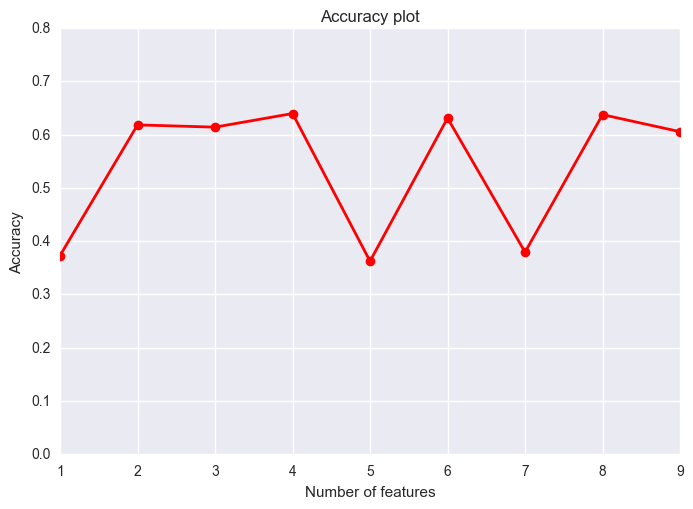

In [25]:
cfg = config_rfc()
train(X,y,cfg,modele_type='k_means')

After iteratively removing the features, we can see the highest accuracy level (around 65%) is given when the number of features equal 4 and the silhouette score is not very low (around 48%).